# Deep Learning
## HW2 - Problem 3 -sign language (80+16pts)



1.   Full Name: Radmehr Karimian
2.   Student Number: 98103556




In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Activation, InputLayer, Dropout

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [5]:
cd /content/gdrive/MyDrive/DeepLearning

/content/gdrive/MyDrive/DeepLearning


In [6]:
df_train = pd.read_csv('Q3_train.csv')
df_test = pd.read_csv('Q3_test.csv')
print(f"Shape of training dataframe:{df_train.shape}")
print(f"Shape of test dataframe:{df_test.shape}")
df_train.head()

Shape of training dataframe:(27455, 785)
Shape of test dataframe:(7172, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [7]:
df_tmp = df_train.copy()
y_train = df_tmp.pop('label')
X_train = df_tmp

df_tmp = df_test.copy()
y_test = df_tmp.pop('label')
X_test = df_tmp

scaler1 = StandardScaler()
scaler1.fit(X_train)
X_train = scaler1.transform(X_train)
X_test = scaler1.transform(X_test)

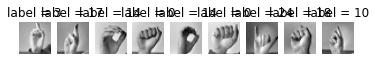

In [7]:
np.random.seed(50)
pics_no = np.random.randint(0, X_train.shape[0], 9)

rows = 1
cols = 9
axes=[]
fig=plt.figure()

for j, i in enumerate(pics_no):
    img, label = X_train[i], y_train[i]
    axes.append(fig.add_subplot(rows, cols, j+1) )
    subplot_title=(f"label = {label}")
    axes[-1].set_title(subplot_title) 
    plt.axis(False) 
    plt.imshow(np.array(img).reshape((28,28)), cmap='gray')
plt.show()

In [38]:
train_df = df_train.sample(frac=1, random_state=42) # Shuffiling the entire dataset

In [39]:
X, y = train_df.drop('label', axis=1), train_df['label'] # Split the dataset into X, y

In [40]:
X.shape, y.shape

((27455, 784), (27455,))

In [41]:
np.unique(X.dtypes), y.dtype

(array([dtype('int64')], dtype=object), dtype('int64'))

In [43]:
X = X/255.0 # Normalizing the training data and converting the data type to float
np.unique(X.dtypes)

array([dtype('float64')], dtype=object)

In [44]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer() # Binarize labels in a one-vs-all fashion (return one-hot encoded vectors)
y = label_binarizer.fit_transform(y)

In [45]:
X = tf.reshape(X, [-1, 28, 28, 1])

In [34]:
X_train, X_valid = X[:25000], X[25000:]
y_train, y_valid = y[:25000], y[25000:]

In [16]:
# Defining the CNN

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(24, activation='softmax'))

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)        0

In [19]:
save_best_cb = keras.callbacks.ModelCheckpoint('models/initial-end-to-end', save_best_only=True) # Saves the best model so far
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5) # Interupts training when there is no progress

In [22]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])

Epoch 1/20
781/782 [============================>.] - ETA: 0s - loss: 2.6621e-08 - accuracy: 1.0000

782/782 [==============================] - 103s 131ms/step - loss: 2.6617e-08 - accuracy: 1.0000 - val_loss: 5.8465e-07 - val_accuracy: 1.0000
Epoch 2/20
781/782 [============================>.] - ETA: 0s - loss: 1.8064e-08 - accuracy: 1.0000

782/782 [==============================] - 111s 142ms/step - loss: 1.8058e-08 - accuracy: 1.0000 - val_loss: 3.8912e-07 - val_accuracy: 1.0000
Epoch 3/20
781/782 [============================>.] - ETA: 0s - loss: 1.2054e-08 - accuracy: 1.0000

782/782 [==============================] - 101s 129ms/step - loss: 1.2054e-08 - accuracy: 1.0000 - val_loss: 2.9839e-07 - val_accuracy: 1.0000
Epoch 4/20
781/782 [============================>.] - ETA: 0s - loss: 8.5906e-09 - accuracy: 1.0000

782/782 [==============================] - 99s 126ms/step - loss: 8.5878e-09 - accuracy: 1.0000 - val_loss: 1.7788e-07 - val_accuracy: 1.0000
Epoch 5/20
781/782 [============================>.] - ETA: 0s - loss: 5.9910e-09 - accuracy: 1.0000

782/782 [==============================] - 101s 129ms/step - loss: 5.9891e-09 - accuracy: 1.0000 - val_loss: 1.1143e-07 - val_accuracy: 1.0000
Epoch 6/20
781/782 [============================>.] - ETA: 0s - loss: 4.4885e-09 - accuracy: 1.0000

782/782 [==============================] - 101s 130ms/step - loss: 4.4870e-09 - accuracy: 1.0000 - val_loss: 5.9625e-08 - val_accuracy: 1.0000
Epoch 7/20
781/782 [============================>.] - ETA: 0s - loss: 3.2292e-09 - accuracy: 1.0000

782/782 [==============================] - 102s 130ms/step - loss: 3.2282e-09 - accuracy: 1.0000 - val_loss: 3.5786e-08 - val_accuracy: 1.0000
Epoch 8/20
781/782 [============================>.] - ETA: 0s - loss: 2.6091e-09 - accuracy: 1.0000

782/782 [==============================] - 111s 141ms/step - loss: 2.6083e-09 - accuracy: 1.0000 - val_loss: 2.3939e-08 - val_accuracy: 1.0000
Epoch 9/20
782/782 [==============================] - 102s 131ms/step - loss: 2.1029e-09 - accuracy: 1.0000 - val_loss: 3.0299e-08 - val_accuracy: 1.0000
Epoch 10/20
781/782 [============================>.] - ETA: 0s - loss: 1.7124e-09 - accuracy: 1.0000

782/782 [==============================] - 99s 127ms/step - loss: 1.7118e-09 - accuracy: 1.0000 - val_loss: 1.6121e-08 - val_accuracy: 1.0000
Epoch 11/20
781/782 [============================>.] - ETA: 0s - loss: 1.4548e-09 - accuracy: 1.0000

782/782 [==============================] - 101s 129ms/step - loss: 1.4544e-09 - accuracy: 1.0000 - val_loss: 1.1654e-08 - val_accuracy: 1.0000
Epoch 12/20
781/782 [============================>.] - ETA: 0s - loss: 1.3165e-09 - accuracy: 1.0000

782/782 [==============================] - 101s 129ms/step - loss: 1.3161e-09 - accuracy: 1.0000 - val_loss: 6.9437e-09 - val_accuracy: 1.0000
Epoch 13/20
782/782 [==============================] - 98s 125ms/step - loss: 0.1032 - accuracy: 0.9730 - val_loss: 0.0376 - val_accuracy: 0.9894
Epoch 14/20
782/782 [==============================] - 99s 127ms/step - loss: 0.0085 - accuracy: 0.9976 - val_loss: 1.2898e-04 - val_accuracy: 1.0000
Epoch 15/20
782/782 [==============================] - 99s 127ms/step - loss: 6.4249e-05 - accuracy: 1.0000 - val_loss: 6.7462e-05 - val_accuracy: 1.0000
Epoch 16/20
782/782 [==============================] - 98s 125ms/step - loss: 3.2023e-05 - accuracy: 1.0000 - val_loss: 4.1584e-05 - val_accuracy: 1.0000
Epoch 17/20
782/782 [==============================] - 99s 127ms/step - loss: 1.8764e-05 - accuracy: 1.0000 - val_loss: 2.6685e-05 - val_accuracy: 1.0000


In [24]:
import pickle
with open('models/intial-end-to-end-history', 'wb') as history_file:
     pickle.dump(history.history, history_file)

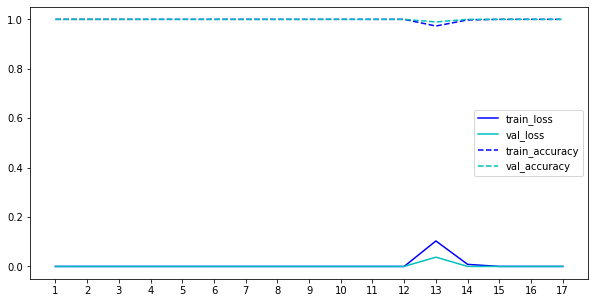

In [25]:
h = np.load('models/intial-end-to-end-history', allow_pickle=True)
best_model = keras.models.load_model('models/initial-end-to-end') 
fig, ax = plt.subplots(figsize=(10, 5))
n_epochs = len(h['loss'])
ax.plot(range(1, n_epochs+1), h['loss'], color='b', label='train_loss')
ax.plot(range(1, n_epochs+1), h['val_loss'], color='c', label='val_loss')
ax.plot(range(1, n_epochs+1), h['accuracy'], color='b', label='train_accuracy', linestyle='--')
ax.plot(range(1, n_epochs+1), h['val_accuracy'], color='c', label='val_accuracy', linestyle='--')
ax.set_xticks(range(1, n_epochs+1))
ax.legend()

In [91]:
X_test, y_test = df_test.drop('label', axis=1), df_test['label']

In [92]:
X_test = tf.reshape(X_test, [-1, 28, 28, 1])

In [93]:
y_test = label_binarizer.transform(y_test)

In [30]:
best_model.evaluate(X_test, y_test)

225/225 [==============================] - 8s 34ms/step - loss: 0.2588 - accuracy: 0.9506


[0.25876376032829285, 0.950641393661499]

In [81]:

model2 = keras.models.Sequential()
model2.add(keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model2.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu'))
model2.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(keras.layers.Conv2D(128, (5, 5), padding='same', activation='relu'))
model2.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(128, activation='relu'))
model2.add(keras.layers.Dense(24, activation='softmax'))

In [82]:
 model2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [83]:
save_best_cb = keras.callbacks.ModelCheckpoint('models/initial-end-to-end2', save_best_only=True) # Saves the best model so far
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5) # Interupts training when there is no progress

In [85]:
history2 = model2.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])

Epoch 1/20
610/610 [==============================] - ETA: 0s - loss: 9.5661e-04 - accuracy: 1.0000

610/610 [==============================] - 112s 184ms/step - loss: 9.5661e-04 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 2/20
610/610 [==============================] - ETA: 0s - loss: 8.7911e-04 - accuracy: 1.0000

610/610 [==============================] - 104s 170ms/step - loss: 8.7911e-04 - accuracy: 1.0000 - val_loss: 9.9812e-04 - val_accuracy: 1.0000
Epoch 3/20
610/610 [==============================] - ETA: 0s - loss: 8.2263e-04 - accuracy: 1.0000

610/610 [==============================] - 98s 161ms/step - loss: 8.2263e-04 - accuracy: 1.0000 - val_loss: 9.5983e-04 - val_accuracy: 1.0000
Epoch 4/20
610/610 [==============================] - ETA: 0s - loss: 7.6273e-04 - accuracy: 1.0000

610/610 [==============================] - 97s 160ms/step - loss: 7.6273e-04 - accuracy: 1.0000 - val_loss: 8.7744e-04 - val_accuracy: 1.0000
Epoch 5/20
610/610 [==============================] - ETA: 0s - loss: 7.2445e-04 - accuracy: 1.0000

610/610 [==============================] - 96s 157ms/step - loss: 7.2445e-04 - accuracy: 1.0000 - val_loss: 8.4031e-04 - val_accuracy: 1.0000
Epoch 6/20
610/610 [==============================] - ETA: 0s - loss: 6.7658e-04 - accuracy: 1.0000

610/610 [==============================] - 99s 162ms/step - loss: 6.7658e-04 - accuracy: 1.0000 - val_loss: 7.8365e-04 - val_accuracy: 1.0000
Epoch 7/20
610/610 [==============================] - ETA: 0s - loss: 6.3897e-04 - accuracy: 1.0000

610/610 [==============================] - 97s 159ms/step - loss: 6.3897e-04 - accuracy: 1.0000 - val_loss: 7.3486e-04 - val_accuracy: 1.0000
Epoch 8/20
610/610 [==============================] - ETA: 0s - loss: 6.0330e-04 - accuracy: 1.0000

610/610 [==============================] - 106s 174ms/step - loss: 6.0330e-04 - accuracy: 1.0000 - val_loss: 6.9299e-04 - val_accuracy: 1.0000
Epoch 9/20
610/610 [==============================] - ETA: 0s - loss: 5.7168e-04 - accuracy: 1.0000

610/610 [==============================] - 97s 160ms/step - loss: 5.7168e-04 - accuracy: 1.0000 - val_loss: 6.7150e-04 - val_accuracy: 1.0000
Epoch 10/20
610/610 [==============================] - ETA: 0s - loss: 5.4105e-04 - accuracy: 1.0000

610/610 [==============================] - 99s 163ms/step - loss: 5.4105e-04 - accuracy: 1.0000 - val_loss: 6.6047e-04 - val_accuracy: 1.0000
Epoch 11/20
610/610 [==============================] - ETA: 0s - loss: 5.1651e-04 - accuracy: 1.0000

610/610 [==============================] - 97s 160ms/step - loss: 5.1651e-04 - accuracy: 1.0000 - val_loss: 5.9836e-04 - val_accuracy: 1.0000
Epoch 12/20
610/610 [==============================] - ETA: 0s - loss: 4.9575e-04 - accuracy: 1.0000

610/610 [==============================] - 99s 162ms/step - loss: 4.9575e-04 - accuracy: 1.0000 - val_loss: 5.7800e-04 - val_accuracy: 1.0000
Epoch 13/20
610/610 [==============================] - ETA: 0s - loss: 4.7785e-04 - accuracy: 1.0000

610/610 [==============================] - 98s 161ms/step - loss: 4.7785e-04 - accuracy: 1.0000 - val_loss: 5.6214e-04 - val_accuracy: 1.0000
Epoch 14/20
610/610 [==============================] - ETA: 0s - loss: 4.5361e-04 - accuracy: 1.0000

610/610 [==============================] - 97s 158ms/step - loss: 4.5361e-04 - accuracy: 1.0000 - val_loss: 5.3563e-04 - val_accuracy: 1.0000
Epoch 15/20
610/610 [==============================] - 98s 160ms/step - loss: 4.3372e-04 - accuracy: 1.0000 - val_loss: 5.5264e-04 - val_accuracy: 1.0000
Epoch 16/20
610/610 [==============================] - ETA: 0s - loss: 4.1685e-04 - accuracy: 1.0000

610/610 [==============================] - 97s 159ms/step - loss: 4.1685e-04 - accuracy: 1.0000 - val_loss: 5.1422e-04 - val_accuracy: 1.0000
Epoch 17/20
610/610 [==============================] - ETA: 0s - loss: 4.0248e-04 - accuracy: 1.0000

610/610 [==============================] - 98s 161ms/step - loss: 4.0248e-04 - accuracy: 1.0000 - val_loss: 4.7765e-04 - val_accuracy: 1.0000
Epoch 18/20
610/610 [==============================] - ETA: 0s - loss: 3.8579e-04 - accuracy: 1.0000

610/610 [==============================] - 97s 159ms/step - loss: 3.8579e-04 - accuracy: 1.0000 - val_loss: 4.6860e-04 - val_accuracy: 1.0000
Epoch 19/20
610/610 [==============================] - ETA: 0s - loss: 3.7281e-04 - accuracy: 1.0000

610/610 [==============================] - 98s 160ms/step - loss: 3.7281e-04 - accuracy: 1.0000 - val_loss: 4.4951e-04 - val_accuracy: 1.0000
Epoch 20/20
610/610 [==============================] - ETA: 0s - loss: 3.5841e-04 - accuracy: 1.0000

610/610 [==============================] - 97s 159ms/step - loss: 3.5841e-04 - accuracy: 1.0000 - val_loss: 4.3319e-04 - val_accuracy: 1.0000


In [86]:
import pickle
with open('models/intial-end-to-end-history2', 'wb') as history_file:
     pickle.dump(history2.history, history_file)

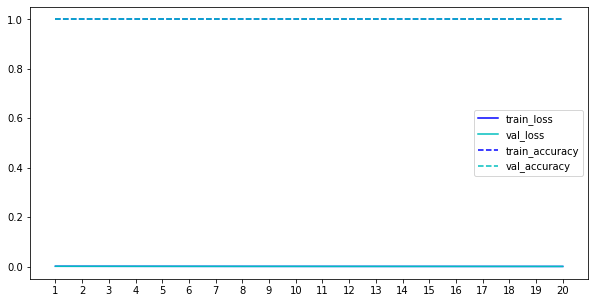

In [94]:
h = np.load('models/intial-end-to-end-history2', allow_pickle=True)
best_model = keras.models.load_model('models/initial-end-to-end2') 
fig, ax = plt.subplots(figsize=(10, 5))
n_epochs = len(h['loss'])
ax.plot(range(1, n_epochs+1), h['loss'], color='b', label='train_loss')
ax.plot(range(1, n_epochs+1), h['val_loss'], color='c', label='val_loss')
ax.plot(range(1, n_epochs+1), h['accuracy'], color='b', label='train_accuracy', linestyle='--')
ax.plot(range(1, n_epochs+1), h['val_accuracy'], color='c', label='val_accuracy', linestyle='--')
ax.set_xticks(range(1, n_epochs+1))
ax.legend()

In [95]:
best_model.evaluate(X_test, y_test)

225/225 [==============================] - 9s 37ms/step - loss: 98.9735 - accuracy: 0.8985


[98.97352600097656, 0.8984941244125366]

In [46]:

X_train, X_valid = X[:19500], X[19500:]
y_train, y_valid = y[:19500], y[19500:]


In [ ]:
# Models
# 'models/experiment-dropout-0'
# 'models/experiment-dropout-1'
# 'models/experiment-dropout-2'

# History objects
# 'models/experiment-dropout-0-history'
# 'models/experiment-dropout-1-history'
# 'models/experiment-dropout-2-history'
import pickle
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

dropout_rates = [0.3, 0.4, 0.5]

for index, i in enumerate(dropout_rates):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(24, (5, 5), padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(i))
    model.add(keras.layers.Conv2D(48, (5, 5), padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(i))
    model.add(keras.layers.Conv2D(96, (5, 5), padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(i))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dropout(i))
    model.add(keras.layers.Dense(24, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    save_best_cb = keras.callbacks.ModelCheckpoint(f'models/experiment-dropout-{index}', save_best_only=True)
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])
    with open(f'models/experiment-dropout-{index}-history', 'wb') as history_file:
        pickle.dump(history.history, history_file)

Epoch 1/10
609/610 [============================>.] - ETA: 0s - loss: 1.9226 - accuracy: 0.3937

610/610 [==============================] - 69s 113ms/step - loss: 1.9218 - accuracy: 0.3939 - val_loss: 0.3556 - val_accuracy: 0.9065
Epoch 2/10
609/610 [============================>.] - ETA: 0s - loss: 0.4113 - accuracy: 0.8573

610/610 [==============================] - 69s 114ms/step - loss: 0.4111 - accuracy: 0.8574 - val_loss: 0.0534 - val_accuracy: 0.9913
Epoch 3/10
609/610 [============================>.] - ETA: 0s - loss: 0.1762 - accuracy: 0.9420

610/610 [==============================] - 70s 116ms/step - loss: 0.1761 - accuracy: 0.9421 - val_loss: 0.0134 - val_accuracy: 0.9977
Epoch 4/10
609/610 [============================>.] - ETA: 0s - loss: 0.1092 - accuracy: 0.9638

610/610 [==============================] - 68s 112ms/step - loss: 0.1091 - accuracy: 0.9638 - val_loss: 0.0078 - val_accuracy: 0.9986
Epoch 5/10
609/610 [============================>.] - ETA: 0s - loss: 0.0815 - accuracy: 0.9739

610/610 [==============================] - 68s 111ms/step - loss: 0.0815 - accuracy: 0.9739 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 6/10
609/610 [============================>.] - ETA: 0s - loss: 0.0711 - accuracy: 0.9778

610/610 [==============================] - 68s 112ms/step - loss: 0.0710 - accuracy: 0.9778 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 7/10
609/610 [============================>.] - ETA: 0s - loss: 0.0535 - accuracy: 0.9834

610/610 [==============================] - 69s 114ms/step - loss: 0.0535 - accuracy: 0.9834 - val_loss: 9.4717e-04 - val_accuracy: 0.9999
Epoch 8/10
610/610 [==============================] - 67s 110ms/step - loss: 0.0528 - accuracy: 0.9833 - val_loss: 0.0012 - val_accuracy: 0.9999
Epoch 9/10
609/610 [============================>.] - ETA: 0s - loss: 0.0465 - accuracy: 0.9856

610/610 [==============================] - 69s 113ms/step - loss: 0.0465 - accuracy: 0.9856 - val_loss: 3.5268e-04 - val_accuracy: 1.0000
Epoch 10/10
609/610 [============================>.] - ETA: 0s - loss: 0.0483 - accuracy: 0.9849

610/610 [==============================] - 70s 115ms/step - loss: 0.0485 - accuracy: 0.9848 - val_loss: 1.6194e-04 - val_accuracy: 1.0000
Epoch 1/10
610/610 [==============================] - ETA: 0s - loss: 2.1944 - accuracy: 0.3166

610/610 [==============================] - 71s 115ms/step - loss: 2.1944 - accuracy: 0.3166 - val_loss: 0.5187 - val_accuracy: 0.8641
Epoch 2/10
609/610 [============================>.] - ETA: 0s - loss: 0.6061 - accuracy: 0.7904

610/610 [==============================] - 72s 118ms/step - loss: 0.6060 - accuracy: 0.7905 - val_loss: 0.1081 - val_accuracy: 0.9779
Epoch 3/10
609/610 [============================>.] - ETA: 0s - loss: 0.3143 - accuracy: 0.8912

610/610 [==============================] - 69s 114ms/step - loss: 0.3142 - accuracy: 0.8912 - val_loss: 0.0348 - val_accuracy: 0.9953
Epoch 4/10
609/610 [============================>.] - ETA: 0s - loss: 0.2115 - accuracy: 0.9290

610/610 [==============================] - 69s 114ms/step - loss: 0.2114 - accuracy: 0.9290 - val_loss: 0.0126 - val_accuracy: 0.9995
Epoch 5/10
609/610 [============================>.] - ETA: 0s - loss: 0.1570 - accuracy: 0.9480

610/610 [==============================] - 71s 117ms/step - loss: 0.1570 - accuracy: 0.9481 - val_loss: 0.0056 - val_accuracy: 0.9992
Epoch 6/10
609/610 [============================>.] - ETA: 0s - loss: 0.1285 - accuracy: 0.9578

610/610 [==============================] - 69s 113ms/step - loss: 0.1285 - accuracy: 0.9577 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 7/10
610/610 [==============================] - 67s 110ms/step - loss: 0.1054 - accuracy: 0.9644 - val_loss: 0.0044 - val_accuracy: 0.9991
Epoch 8/10
609/610 [============================>.] - ETA: 0s - loss: 0.1019 - accuracy: 0.9671

610/610 [==============================] - 71s 116ms/step - loss: 0.1018 - accuracy: 0.9671 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 9/10
610/610 [==============================] - 68s 111ms/step - loss: 0.0909 - accuracy: 0.9707 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 10/10
609/610 [============================>.] - ETA: 0s - loss: 0.0831 - accuracy: 0.9723

610/610 [==============================] - 69s 113ms/step - loss: 0.0831 - accuracy: 0.9723 - val_loss: 5.3527e-04 - val_accuracy: 1.0000
Epoch 1/10
609/610 [============================>.] - ETA: 0s - loss: 2.6870 - accuracy: 0.1780

610/610 [==============================] - 70s 113ms/step - loss: 2.6865 - accuracy: 0.1782 - val_loss: 1.1665 - val_accuracy: 0.6603
Epoch 2/10
609/610 [============================>.] - ETA: 0s - loss: 1.1522 - accuracy: 0.6077

610/610 [==============================] - 69s 112ms/step - loss: 1.1519 - accuracy: 0.6077 - val_loss: 0.4339 - val_accuracy: 0.8993
Epoch 3/10
609/610 [============================>.] - ETA: 0s - loss: 0.7097 - accuracy: 0.7527

610/610 [==============================] - 70s 114ms/step - loss: 0.7094 - accuracy: 0.7528 - val_loss: 0.2123 - val_accuracy: 0.9625
Epoch 4/10
609/610 [============================>.] - ETA: 0s - loss: 0.5291 - accuracy: 0.8173

610/610 [==============================] - 69s 114ms/step - loss: 0.5292 - accuracy: 0.8173 - val_loss: 0.1158 - val_accuracy: 0.9840
Epoch 5/10
609/610 [============================>.] - ETA: 0s - loss: 0.4105 - accuracy: 0.8573

610/610 [==============================] - 70s 114ms/step - loss: 0.4105 - accuracy: 0.8572 - val_loss: 0.0612 - val_accuracy: 0.9908
Epoch 6/10
609/610 [============================>.] - ETA: 0s - loss: 0.3361 - accuracy: 0.8827

610/610 [==============================] - 68s 111ms/step - loss: 0.3360 - accuracy: 0.8828 - val_loss: 0.0503 - val_accuracy: 0.9955
Epoch 7/10
609/610 [============================>.] - ETA: 0s - loss: 0.2916 - accuracy: 0.9001

610/610 [==============================] - 69s 113ms/step - loss: 0.2915 - accuracy: 0.9002 - val_loss: 0.0252 - val_accuracy: 0.9984
Epoch 8/10
609/610 [============================>.] - ETA: 0s - loss: 0.2515 - accuracy: 0.9152

610/610 [==============================] - 70s 115ms/step - loss: 0.2519 - accuracy: 0.9151 - val_loss: 0.0132 - val_accuracy: 0.9989
Epoch 9/10
609/610 [============================>.] - ETA: 0s - loss: 0.2349 - accuracy: 0.9196

610/610 [==============================] - 69s 113ms/step - loss: 0.2350 - accuracy: 0.9196 - val_loss: 0.0109 - val_accuracy: 0.9985
Epoch 10/10
609/610 [============================>.] - ETA: 0s - loss: 0.2154 - accuracy: 0.9271

In [56]:
for index in range(3):
    model = keras.models.load_model(f'models/experiment-dropout-{index}')
    model.evaluate(X_valid, y_valid)

249/249 [==============================] - 13s 51ms/step - loss: 0.0054 - accuracy: 1.0000


In [57]:
h_0 = np.load('models/experiment-dropout-0-history', allow_pickle=True)
h_1 = np.load('models/experiment-dropout-1-history', allow_pickle=True)
h_2 = np.load('models/experiment-dropout-2-history', allow_pickle=True)

In [60]:
def get_train_val_plots(h, yticks=None, figsize=(10, 5)):
    # h: Any dictionary like the history.history
    
    fig, ax = plt.subplots(figsize=figsize)
    n_epochs = len(h['loss'])
    x_loss = np.arange(n_epochs+1)-0.5
    
    ax.plot(x_loss[x_loss >= 0], h['loss'], color='b', label='train_loss')
    ax.plot(range(1, n_epochs+1), h['val_loss'], color='r', label='val_loss')
    ax.plot(range(1, n_epochs+1), h['accuracy'], color='b', label='train_accuracy', linestyle='--')
    ax.plot(range(1, n_epochs+1), h['val_accuracy'], color='r', label='val_accuracy', linestyle='--')
    ax.set_xlim(0, n_epochs)
    ax.set_xticks(range(1, n_epochs+1))
    if yticks is not None:
        ax.set_yticks(yticks)
    ax.legend()

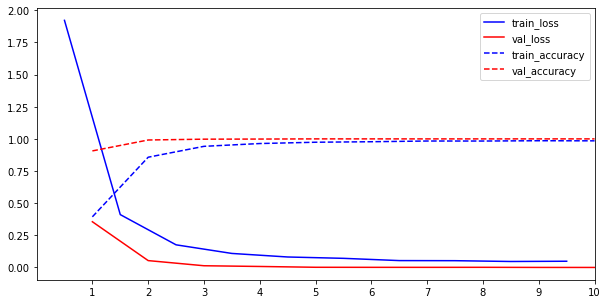

In [61]:
get_train_val_plots(h_0)


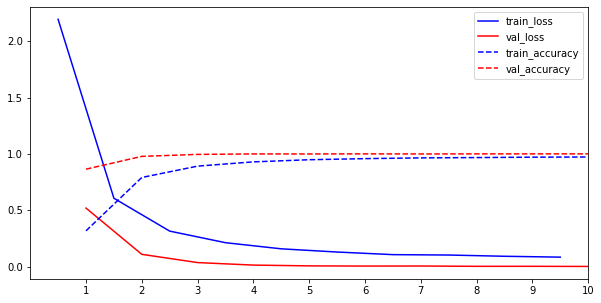

In [62]:
get_train_val_plots(h_1)

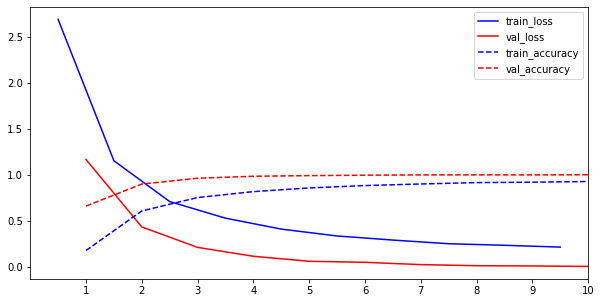

In [63]:
get_train_val_plots(h_2)

In [64]:
best_model = keras.models.load_model('models/experiment-dropout-0/')

In [73]:
X_test, y_test = df_test.drop('label', axis=1), df_test['label']

In [74]:
X_test /= 255.0

In [77]:
def test_model(model, X_test, y_test, label_binarizer):
    X_test_reshape = tf.reshape(X_test, [-1, 28, 28, 1])
    y_test_labels = label_binarizer.transform(y_test)
    results = model.evaluate(X_test_reshape, y_test_labels)
    print(f'Loss: {results[0]:.3f} Accuracy: {results[1]:.3f}')

In [78]:
test_model(best_model, X_test, y_test, label_binarizer)

225/225 [==============================] - 6s 26ms/step - loss: 0.0918 - accuracy: 0.9845
Loss: 0.092 Accuracy: 0.985


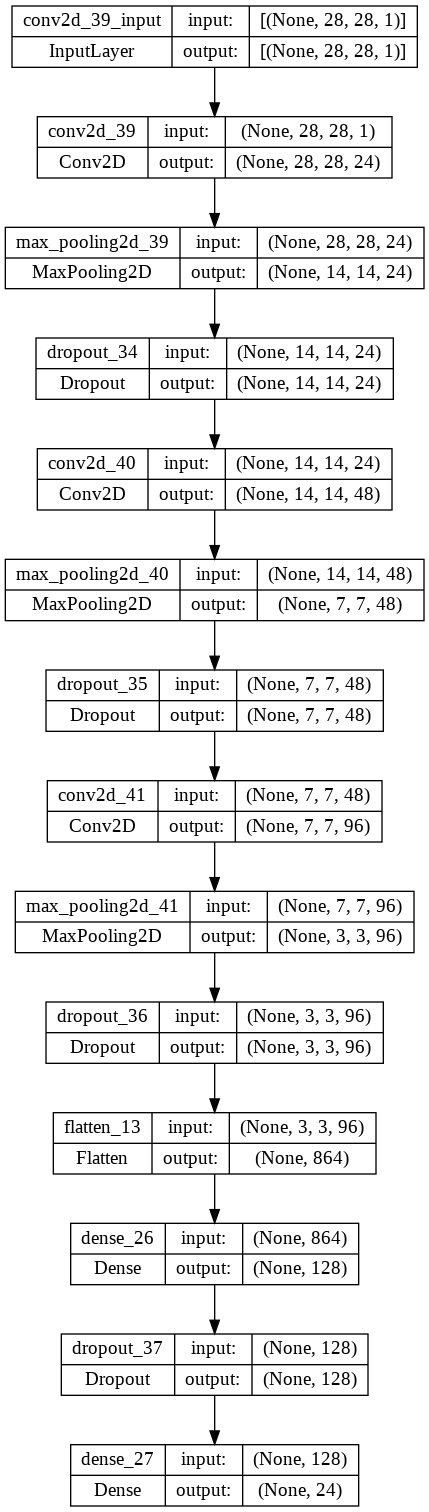

In [80]:
from keras.utils import plot_model
plot_model(best_model, to_file='model.png', show_shapes=True, show_layer_names=True)

## Conclusion: 
By addition a dropout layer after each hidden layer, we are regularizing the network. As a result, we expect to see a model that is less overfitted, meaning that the validation accuracy increases.<br>
As shown in the figures above, with the addition of the validation accuracy and train accuracy stay very close (since no overfitting occurs), however, without dropout layers, the training accuracy could reach 99% while the validation accuracy remained around 98%.

## Conclusion: 

Adam is well known to perform worse than SGD for image classification tasks.
But not in this senario!
SGD converges much slower than ADAM. 

In [ ]:
data = []
labels = []
columns = []
for i in range(1,785):
  columns.append('pixel'+str(i))
print(columns)

In [ ]:
import cv2
image = cv2.imread(filename,0)
image = cv2.resize(image, (28, 28),interpolation = cv2.INTER_LINEAR)
cv2_imshow(image)

data.append(list(np.array(image,dtype=np.float64).reshape(784)))
labels.append(IMAGE_CLASS)  ##image_lcass

In [ ]:
data = np.array(data)
dataf = pd.DataFrame(data/255, columns=columns)
data = Data(dataf.to_numpy(), np.array())
dataloader = DataLoader(dataset=data, batch_size=batch_size, shuffle=False)

In [ ]:
test_model(best_model, data, labels, label_binarizer)